In [1]:
import pandas as pd
import numpy as np
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from seaborn import heatmap

In [2]:
try:
    classifier = pipeline('sentiment-analysis', model='distilroberta_emo')
except FileNotFoundError as e:
    print(e, 'Downloading weigths...')
    classifier = pipeline("sentiment-analysis",model="j-hartmann/emotion-english-distilroberta-base")

print('model ready')

model ready


In [3]:
dataset = pd.read_csv('sth_senti.csv', sep='\t', header=None)
dataset.columns = ['id', 'content', 'sentiment', 'DROPIT']
dataset.drop('DROPIT', axis=1, inplace=True)
dataset.set_index('id', inplace=True)

In [6]:
sample = dataset.sample(100)
output = [classifier(txt) for txt in sample.content.values.tolist()]
sample['emo'] = [[p['label'] for p in pred][np.argmax([p['score'] for p in pred])] for pred in output]

In [7]:
accuracy_score(sample.sentiment, sample.emo)

0.77

In [9]:
label_map = dict([(k, v) for v, k in enumerate(sample.emo.value_counts().index.tolist())])

<AxesSubplot:>

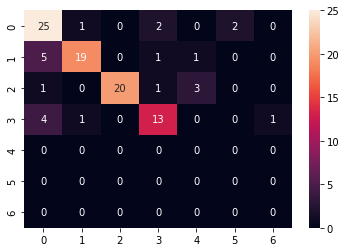

In [10]:
cm = confusion_matrix(sample.sentiment.map(label_map), sample.emo.map(label_map))
heatmap(cm, annot=True, fmt='d')

In [11]:
label_map, 'acc', cm.diagonal() / cm.sum(axis=1), 'prec', cm.diagonal() / cm.sum(axis=0)

C:\Users\anton\AppData\Local\Temp\ipykernel_17208\1717034821.py:1: RuntimeWarning: invalid value encountered in true_divide
  label_map, 'acc', cm.diagonal() / cm.sum(axis=1), 'prec', cm.diagonal() / cm.sum(axis=0)


({'fear': 0,
  'anger': 1,
  'joy': 2,
  'sadness': 3,
  'neutral': 4,
  'surprise': 5,
  'disgust': 6},
 'acc',
 array([0.83333333, 0.73076923, 0.8       , 0.68421053,        nan,
               nan,        nan]),
 'prec',
 array([0.71428571, 0.9047619 , 1.        , 0.76470588, 0.        ,
        0.        , 0.        ]))